# Problem 1

a) Implement your own k-means algorithm from the lecture slides using Python. (10 points)

b) Using the k-means algorithm, cluster the data from the attached file cluster_data.txt.
* Plot X, Y coordinates for the entire dataset. Use different symbols and colors to represent your data points for different clusters.
* Label X and Y axis as 'Length' and 'Width', correspondingly. Label each cluster as “Cluster 1”, “Cluster 2”, etc. 
* **Explain** your findings. (5 points)

## a) Implement your own k-means algorithm 

In [109]:
# k-means algorithm
# squared Euclidean distance
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from matplotlib.lines import Line2D
import math


def k_means_clustering(df,k):
    '''
    Takes a dataframe (df) of floats with multiple columns and an int k representing the number of clusters 
    and clusters the data into k clusters
    '''
    N = len(df) # number of points 
    m = k # number of clusters 
    # Choose arbitrary initial estimates for θj(0) for all θj's
    cols = df.columns
    centroids = []
    for i in range(0,m):
        cent_coord = []
        for c in cols:
            cent_coord.append(round(random.uniform((min(df[c])),(max(df[c]))),2))
        centroids.append(tuple(cent_coord))
    
    if len(cols) == 2:
        plot_centroids(df.x,df.y,centroids)
    
    # max value for distance based on input dataset 
    max_dist = dist([min(df[c]) for c in df.columns],[max(df[c]) for c in df.columns])

    df["closest_centroid"]=[None]*len(df) # initialize column to store closest centroid information
    
    centroids_new = [] # for comparison for stopping criteria
    v = 0
    while (centroids_new != centroids) and (v<200): # repeat until no change in θj occurs between two successive iterations
        
        # only update this after the first round
        if v > 0:
            centroids = centroids_new
        centroids_new = [] # reset to an empty list
        closest_centroids_ls = []

        for i in range(0,N):
            # determine closest representitive (θj) for xi
            pt = list(df.iloc[i])[0:len(cols)] # get coordinates for the point
            
            
            min_dist = max_dist
            closest_centroid = 0
            for j in range(0,len(centroids)):
                if dist(pt,centroids[j]) < min_dist:
                    min_dist = dist(pt,centroids[j])
                    closest_centroid = j
            closest_centroids_ls.append(closest_centroid) 
        df["closest_centroid"] = closest_centroids_ls
        
        for i in range(0,m):
            # update centroids - determine θj as the mean of the vectors xi∈X with b(i)=j
            cents = []
            for c in cols:
                cents.append(
                    round(np.mean(df[df['closest_centroid'] == i][c]),2)
                )
            centroids_new.append(tuple(cents))
           
        if len(cols) == 2 and  k < 3:
            plot_clusters(df,centroids)
        elif len(cols) == 2 and v%4== 0: # modulus prevents plotting every iteration and only every 4 for large values of K
            plot_clusters(df,centroids)

        v+=1
    if v > 1000:
        print("Failed to converge after 1000 rounds") 
    return df    


    
def dist(pt1,pt2):
    ''' 
    Takes points represented as tuples pt1 and pt2 of (x,y) and 
    computes the Euclidian distance between them
    '''
    return np.linalg.norm(np.array(pt1)-np.array(pt2))

def plot_centroids(x,y,centroids):
    colors = sns.color_palette("gist_rainbow",len(centroids)).as_hex()
    font = {'size'   : 16}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_facecolor('white')

    plt.grid(b=None)
    
    ax.set_facecolor('white')
    # plot training dataset
    plt.scatter(x, y,color = "#c4c4c4",edgecolor='grey',alpha=0.5,marker="o") 
    # plot centroids
    plt.scatter([x[0] for x in centroids],[x[1] for x in centroids],
                c=colors,
                edgecolor='k',
                s=200,
                marker='X'
               )
    plt.xlabel("Length") 
    plt.ylabel("Width") 
    # add centroid labels
    for i in range(0,len(centroids)): 
        plt.annotate("Centroid "+str(i+1), 
                     (centroids[i][0]+((max(x)-min(x))/20),
                      centroids[i][1]+((max(y)-min(y))/20)),
                     fontweight='bold')
    plt.show()
    
def plot_clusters(df,centroids):
    import matplotlib
    matplotlib.style.use('default')
    colors = sns.color_palette("gist_rainbow",len(centroids)).as_hex()

    
    font = {'size'   : 16}
    matplotlib.rc('font', **font)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_facecolor('white')

    plt.grid(b=None)
    ax.set_facecolor('white')
    # get list of markers to change marker for each cluster
    marker_ls = list((Line2D.markers).keys())[1:-4]
    # plot training data points
    for i in range(0,len(centroids)):
        ax.scatter(df[df.closest_centroid == i].x, 
                    df[df.closest_centroid == i].y,
                    c = colors[i],
                    alpha=0.4,
                    marker = marker_ls[i],
                    edgecolor = colorscale(colors[i],0.7)
                   )
    # plot centroids
    plt.scatter([x[0] for x in centroids],[x[1] for x in centroids],
                c=colors,
                edgecolor='k',
                s=200,
                marker='X'
               )
    
    plt.xlabel("Length") 
    plt.ylabel("Width") 
    # add cluster labels
    for i in range(0,len(centroids)): 
        plt.annotate("Cluster "+str(i+1), 
                     (centroids[i][0]+((max(df.x)-min(df.x))/20),
                      centroids[i][1]+((max(df.y)-min(df.y))/20)),
                     fontweight='bold')
    plt.show()
#     plt.savefig("temp.png",bbox_inches='tight', dpi=300)

    
def clamp(val, minimum=0, maximum=255): 
    ''' Helper function for colorscale '''
    if val < minimum:
        return minimum
    if val > maximum:
        return maximum
    return int(val)

def colorscale(hexstr, s):
    ''' Darkens/lightens a hex color value hexstring by s
            darker:  0 < s < 1
            lighter: s > 1
            Code modified from:  https://thadeusb.com/weblog/2010/10/10/python_scale_hex_color/
            Author: Thadeus Burgess
    '''
    hexstr = hexstr.strip('#')
    if s < 0 or len(hexstr) != 6:
        return hexstr
    r, g, b = int(hexstr[:2], 16), int(hexstr[2:4], 16), int(hexstr[4:], 16)
    r = clamp(r * s)
    g = clamp(g * s)
    b = clamp(b * s)
    return "#%02x%02x%02x" % (r, g, b)

def plot_data_before_custering(x,y):
    import matplotlib
    matplotlib.style.use('default')
    font = {'size'   : 16}
    matplotlib.rc('font', **font)
    fig, ax = plt.subplots(figsize=(6, 4))
#     ax.set_facecolor('white')
    # plot training dataset
    plt.scatter(x, y,color = "#c4c4c4",edgecolor='grey',alpha=0.5,marker="o") 
    plt.xlabel("Length") 
    plt.ylabel("Width") 
    ax.grid(True)
    ax.set_title("Before Clustering")
    plt.show()




## b) Cluster the data from the attached file cluster_data.tx

### 2 Clusters

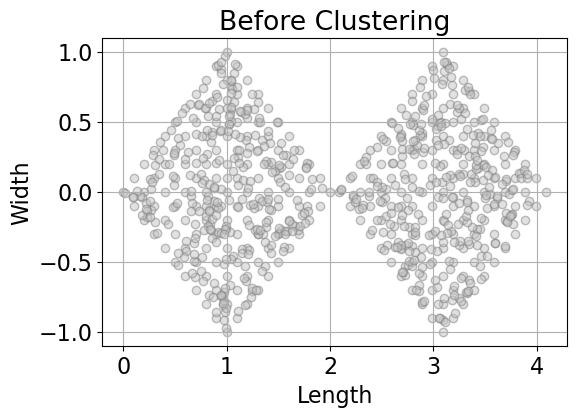

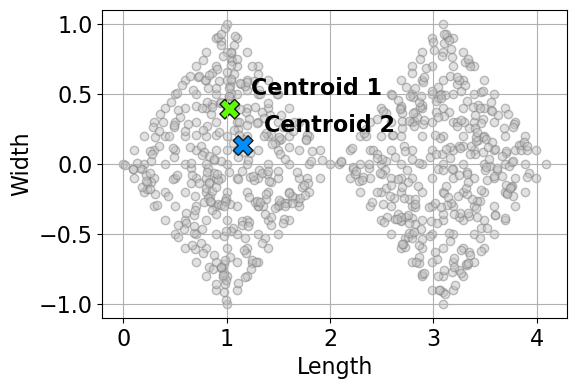

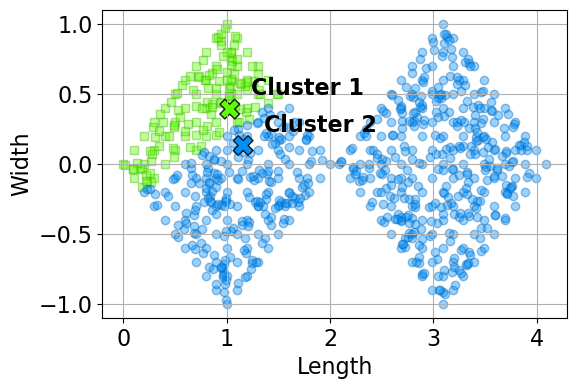

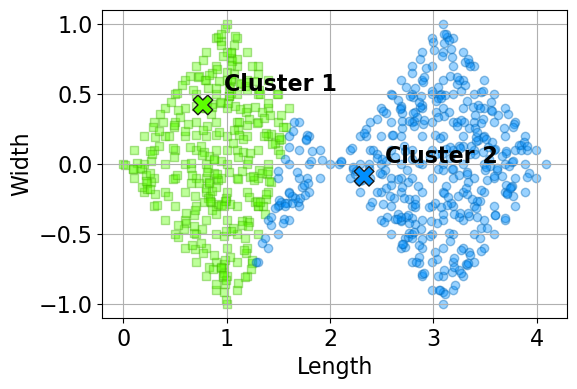

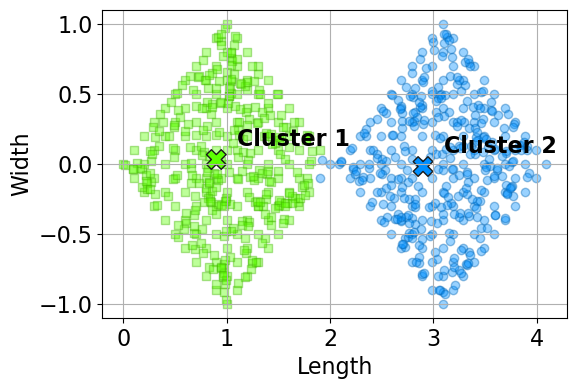

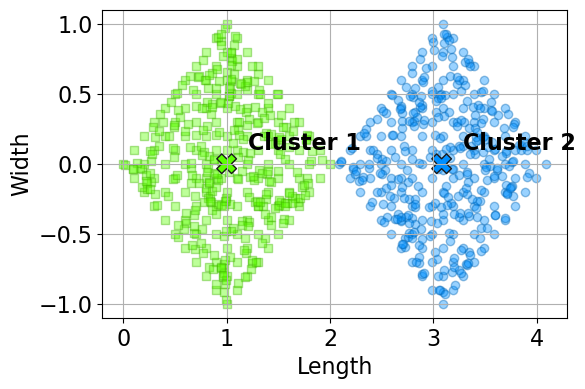

In [110]:
# Load in data from cluster_data.txt file 
import pandas as pd
dat = pd.read_csv('cluster_data.txt', sep="\t", header=None,index_col=0)
dat.columns = ["x","y"]
plot_data_before_custering(dat['x'],dat['y'])
k = 2 # number of clusters
# perform k-means clustering with k clusters
dat = k_means_clustering(dat,k)




### 3 Clusters

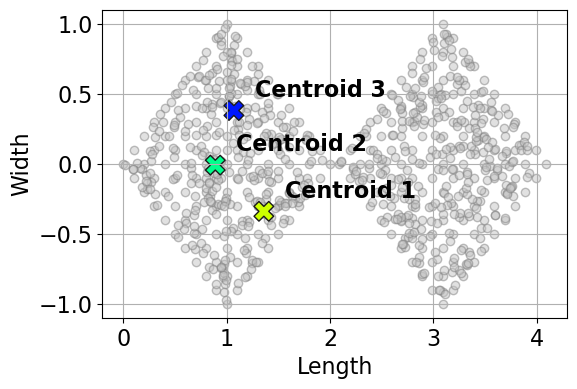

,x,y,closest_centroid
0,,,
1,0.000000,0.000000,1
2,0.100000,-0.100000,1
3,0.200000,-0.200000,1
4,0.300000,-0.300000,1
5,0.400000,-0.400000,1
...,...,...,...
796,3.716809,-0.214190,0
797,2.452936,0.320436,0
798,2.514635,0.376550,0


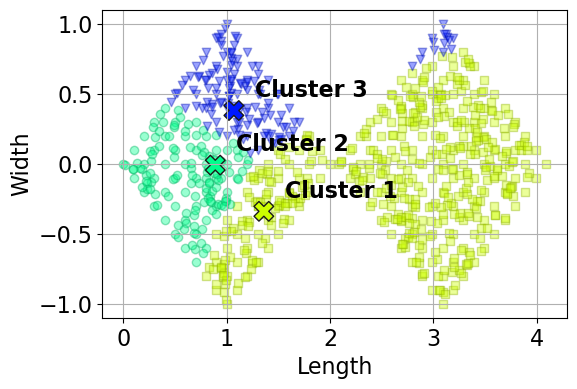

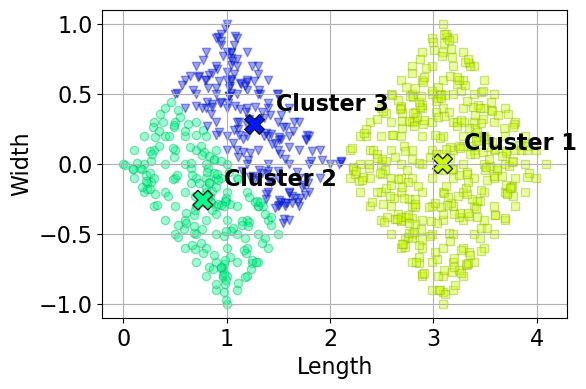

In [111]:
dat = pd.read_csv('cluster_data.txt', sep="\t", header=None,index_col=0)
dat.columns = ["x","y"]
k = 3 # number of clusters
# perform k-means clustering with k clusters
k_means_clustering(dat,k)


### 4 Clusters

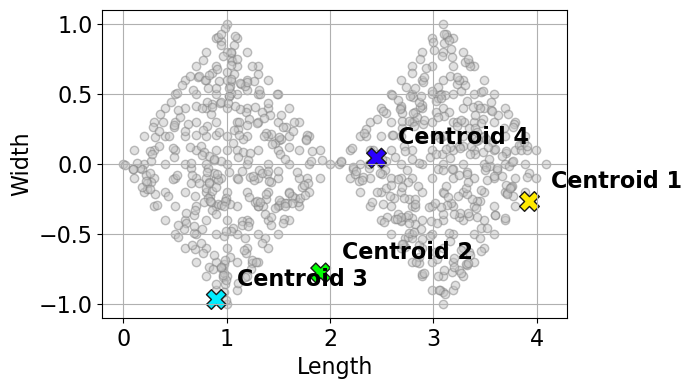

,x,y,closest_centroid
0,,,
1,0.000000,0.000000,2
2,0.100000,-0.100000,2
3,0.200000,-0.200000,2
4,0.300000,-0.300000,2
5,0.400000,-0.400000,2
...,...,...,...
796,3.716809,-0.214190,0
797,2.452936,0.320436,3
798,2.514635,0.376550,3


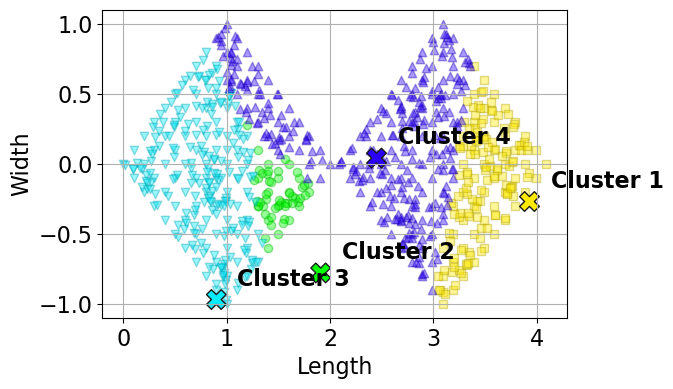

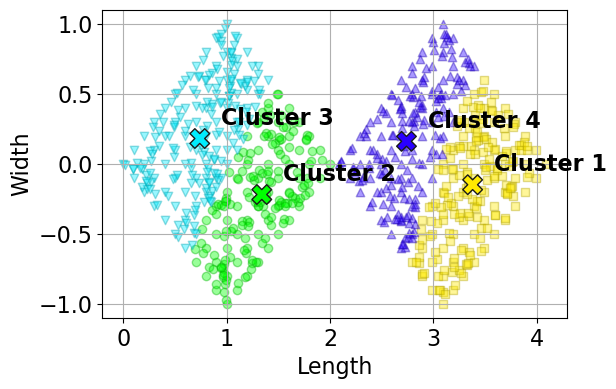

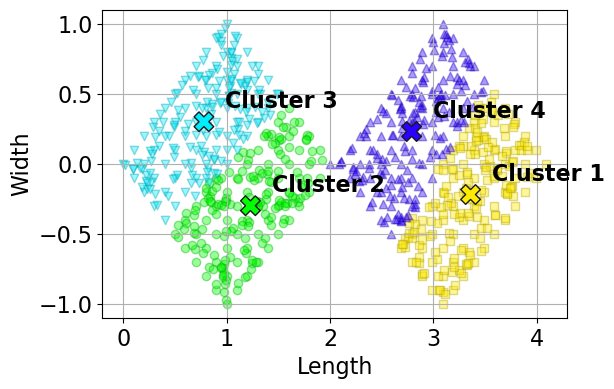

In [112]:
dat = pd.read_csv('cluster_data.txt', sep="\t", header=None,index_col=0)
dat.columns = ["x","y"]
k = 4 # number of clusters
# perform k-means clustering with k clusters
k_means_clustering(dat,k)

## Explanation of findings for Problem 1(b) are in attached PDF file (Explanation Question 1 - Assignment 3-kmonopoli.pdf)


# Problem 2
a) Implement your own logistic regression with regularization algorithm from the lecture slides using Python. (10 points)

b) Using the implemented algorithm, train and test the data from the attached file ckd_data.zip. (10 points)
* Use 80% of each class data to train your classifier and the remaining 20% to test it.
* Run different values of logistic regression regularization parameter (λ). The range of λ is from -2 to 4 and the step is 0.2
* Plot the f-measure of the algorithm’s performance on the training and test sets as a function of λ:



c) Repeat the procedure in (b) but now using the features normalized with the standardization protocol discussed in the class. (5 points)

## a) Logistic regression with regularization Implementation

In [2]:
import numpy as np
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def sigmoid_function(z):
    return 1/(1+np.exp(-z))

def cost_function(h,y):
    ''' Cost function for logistic regression '''
    return (-y*np.log(h)-(1-y)*np.log(1-h))#.mean()


def logistic_regression(df,y,alpha,ld):
    '''
    Takes a dataframe (df) containing features and an array of labels (y) and trains a logistic regression model
    to classify datapoints based on their features. Returns theta, a list of coeficients representing the trained 
    linear model.
    
    df: Pandas dataframe of features with the same length as y
    y: array of data labels that correspond to the data in df
    alpha: float representing the learning rate 
    ld: float representing the regularization parameter lambda
    '''
    m = len(df) # number of training examples
    n = len(df.columns) # dimensionality of feature vector
    
    # Choose arbitrary initial estimates for θj(0) for all θj's
    theta = np.zeros(df.shape[1])

    for i in range(10000): 
        z = np.dot(df, theta)
        h = sigmoid_function(z)
        gradient = ld * (np.dot(df.T, (h - y))) / y.size 
        theta -= alpha * gradient
    return theta


def predict(df,theta):
    preds = sigmoid_function(np.dot(df,theta))>=0.5
    preds_bin = []
    for p in preds:
        if p == True:
            preds_bin.append(1)
        else:
            preds_bin.append(0)
    return preds_bin
            

    

## b) Using the implemented algorithm, train and test the data from the attached file ckd_data.zip. 

### Read in the Data and Clean it

In [21]:
# Read in the data
# header for ckd dataset
import pandas as pd
import numpy as np
header = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','classification']
df_ckd = pd.read_csv("ckd_data/chronic_kidney_disease_full.arff",header=None,names=header)

df_ckd = df_ckd.dropna() # Note this only removes empty columns/rows, it does not remove data in which values are missing as those have ?'s in those cells and are handled below

# cleanup, remove "\t" values from all 
df_ckd[list(df_ckd.columns)] = df_ckd[list(df_ckd.columns)].replace({'\t':''}, regex=True)
df_ckd[list(df_ckd.columns)] = df_ckd[list(df_ckd.columns)].replace({' ':''}, regex=True)


# convert ?'s to NaNs
df_ckd = df_ckd.replace('?',np.NaN) 

# convert relevant columns to numbers
for c in df_ckd.columns:
    try:
        df_ckd[c]=pd.to_numeric(df_ckd[c])
    except:
        pass
    
# Handle missing data 
#   for categorical data, missing data is filled in with the mode of that column
#   for numeric data, missing data is filled in with the mean of that column
for i in range( len(df_ckd.columns)):
    if df_ckd.dtypes[i] == float:
        # replace numeric NaNs with means
        df_ckd[df_ckd.columns[i]].fillna(df_ckd[df_ckd.columns[i]].mean(),inplace=True)
    else:
        # replace string values with modes
        df_ckd[df_ckd.columns[i]].fillna(df_ckd[df_ckd.columns[i]].value_counts().idxmax(),inplace=True)


display(df_ckd)




,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
143,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.20000,yes,yes,no,good,no,no,ckd
144,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.152113,...,38.0,6000.0,4.70709,no,no,no,good,no,no,ckd
145,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.70709,no,yes,no,poor,no,yes,ckd
146,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.90000,yes,no,no,poor,yes,yes,ckd
147,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.60000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.90000,no,no,no,good,no,no,notckd
539,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.20000,no,no,no,good,no,no,notckd
540,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.40000,no,no,no,good,no,no,notckd
541,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.90000,no,no,no,good,no,no,notckd


### Generate Feature Vectors from the Data 

In [22]:
# convert categorical data to numeric
qual_header = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] # column names of categories that are strings

df_ckd_qual = df_ckd[qual_header]


quant_header = [x for x in list(df_ckd.columns) if x not in qual_header]

df_ckd_quant = df_ckd[quant_header]

# Convert data feature vectors using One hot encoding for the qualitative values
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error',drop='if_binary')
enc.fit(df_ckd_qual)

df_ckd_qual = pd.DataFrame(enc.transform(df_ckd_qual).toarray())
df_ckd_qual.columns = qual_header

# combine the qual and quant data back together into a single dataframe
# reset indices for train_qual to match train_quant
df_ckd_qual = df_ckd_qual.set_index(df_ckd_quant.index)
df_ckd_v = pd.concat([df_ckd_quant,df_ckd_qual], axis=1) 



### Generate Training and Testing Sets

In [23]:
# Randomly select training set and set aside remaining data as the test (or evaluation) set
size = 0.2 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ckd_v, test_size=size)

print("Training dataset size:",len(train))
print("Testing dataset size:",len(test))


train_nolab = train[list(train.columns)[0:-1]]

train_lab = train["classification"]

# display(train_nolab)
# display(train_lab)


test_nolab = test[list(test.columns)[0:-1]]

test_lab = test["classification"]

# display(test_nolab)
# display(test_lab)



Training dataset size: 319
Testing dataset size: 80


### Train the model

In [24]:
# Run different values of logistic regression regularization parameter (λ). 
#    The range of λ is from -2 to 4 and the step is 0.2
weights = []
lambda_ls = [round(x,1) for x in list(np.arange(-2.0, 4.2, 0.2))] # produces lis of lambdas from -2 to 4
for l in lambda_ls:
    weights.append([logistic_regression(train_nolab,train_lab,0.1, l)])
    
    


<ipython-input-2-509717c3f3c0>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


### Plot f-measure of the algorithm’s performance on the training and test sets as a function of λ 

In [25]:
def f_measure(actual,predicted):
    '''compute f-measure from array of actual and predicted values'''
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    return (2*pre*rec)/(pre+rec)

<ipython-input-2-509717c3f3c0>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-25-32778b91dbe0>:4: RuntimeWarning: invalid value encountered in long_scalars
  pre = tp/(tp+fp)


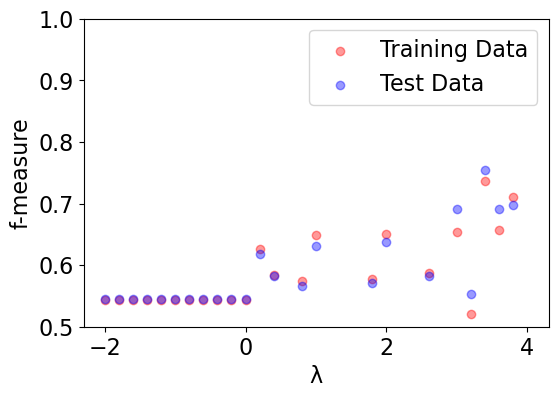

In [27]:
import matplotlib
matplotlib.style.use('default')
# Plot the f-measure of the algorithm’s performance on the training and test 
#  sets as a function of λ:

f_train = []
f_test  = []
for w in weights:
    f_train.append(f_measure(train_lab,predict(train_nolab,w[0])))
    f_test.append(f_measure(test_lab,predict(test_nolab,w[0])))

import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)

plt.figure(figsize=(6,4)) 

plt.scatter(lambda_ls,f_train,
            alpha=0.4,
            color='red',label="Training Data"
           )
plt.scatter(lambda_ls,f_test,
            alpha=0.4,
            color='blue',label="Test Data"
           )
plt.legend()
plt.ylabel("f-measure") 
plt.xlabel("λ") 

plt.ylim(0.5,1)

plt.show()





## c) Repeat the procedure in (b) but now using the features normalized with the standardization protocol discussed in the class.

### Perform Feature Scaling with Standardization

In [28]:
for col in train_nolab.columns:
    train_nolab[col] = (train_nolab[col]-np.mean(train_nolab[col]))/np.std(train_nolab[col])
display(train_nolab)
for col in test_nolab.columns:
    test_nolab[col] = (test_nolab[col]-np.mean(test_nolab[col]))/np.std(test_nolab[col])
display(test_nolab)


<ipython-input-28-5f6f205abfd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_nolab[col] = (train_nolab[col]-np.mean(train_nolab[col]))/np.std(train_nolab[col])


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
175,0.571179,1.121561,-1.359581,-0.018614,0.569492,0.130204,-0.376068,-0.330369,-0.772786,0.070879,...,0.37321,0.500979,-0.345396,-0.237258,1.287763,1.397750,-0.304082,1.976788,-0.496078,-0.431131
510,0.982796,-1.346635,1.415820,-0.792366,-0.430064,-0.329288,-0.336802,-0.419846,0.179926,-0.281097,...,0.37321,0.500979,-0.345396,-0.237258,-0.776540,-0.715436,-0.304082,-0.505871,-0.496078,-0.431131
480,-0.428462,-0.523903,1.415820,-0.792366,-0.430064,-0.775265,-0.356435,-0.464584,0.497496,0.070879,...,0.37321,0.500979,-0.345396,-0.237258,-0.776540,-0.715436,-0.304082,-0.505871,-0.496078,-0.431131
527,0.335969,-1.346635,0.490686,-0.792366,-0.430064,-0.234687,-0.788361,-0.419846,1.926564,0.006884,...,0.37321,0.500979,-0.345396,-0.237258,-0.776540,-0.715436,-0.304082,-0.505871,-0.496078,-0.431131
199,1.453215,-0.523903,-0.434447,1.528889,3.568161,-0.016400,2.078057,1.503914,-1.090357,-0.089110,...,0.37321,-1.996090,2.895229,-0.237258,1.287763,1.397750,3.288589,1.976788,2.015811,-0.431131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.747586,-1.346635,0.490686,-0.792366,-0.430064,-0.586063,-0.611664,-0.509323,1.926564,-0.441086,...,0.37321,0.500979,-0.345396,-0.237258,-0.776540,-0.715436,-0.304082,-0.505871,-0.496078,-0.431131
539,-0.546067,-0.523903,1.415820,-0.792366,-0.430064,-1.005011,-0.533132,-0.397477,0.497496,-0.377090,...,0.37321,0.500979,-0.345396,-0.237258,-0.776540,-0.715436,-0.304082,-0.505871,-0.496078,-0.431131
237,0.806388,-0.523903,-1.359581,-0.792366,-0.430064,-0.761751,0.154023,-0.307999,-0.137645,-0.057112,...,0.37321,0.500979,-0.345396,-0.237258,-0.776540,1.397750,-0.304082,-0.505871,-0.496078,-0.431131
306,-0.310857,0.298829,-1.359581,-0.792366,-0.430064,0.143718,-0.356435,-0.218522,0.338711,-0.185103,...,0.37321,0.500979,-0.345396,-0.237258,1.287763,-0.715436,-0.304082,1.976788,-0.496078,2.319483


<ipython-input-28-5f6f205abfd3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_nolab[col] = (test_nolab[col]-np.mean(test_nolab[col]))/np.std(test_nolab[col])


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
157,0.963929,0.171264,-1.459788,1.687764,1.292380,0.176556,0.843002,0.070095,-0.375951,2.430364,...,0.333333,-2.380476,3.000000,3.872983,1.401058,1.326130,3.229330,1.925067,2.270208,-0.377964
400,-0.839807,-0.954021,0.458440,-0.847653,-0.472994,-0.674833,-0.444457,-0.316298,-0.066633,-0.919276,...,0.333333,0.420084,-0.333333,-0.258199,-0.713746,-0.754074,-0.309662,-0.519462,-0.440488,-0.377964
363,-0.960056,0.171264,-1.459788,-0.847653,-0.472994,-0.520035,0.066963,-0.046004,0.088521,0.235566,...,0.333333,0.420084,-0.333333,-0.258199,-0.713746,-0.754074,-0.309662,-0.519462,-0.440488,-0.377964
289,0.062061,1.296550,-1.459788,-0.002514,2.175067,0.898947,-0.754401,-0.282204,0.180821,-0.547094,...,-3.000000,0.420084,-0.333333,-0.258199,-0.713746,1.326130,-0.309662,-0.519462,-0.440488,-0.377964
274,-2.823917,-1.516664,-1.459788,-0.847653,-0.472994,0.062420,-0.706717,-0.327662,0.088521,0.235566,...,0.333333,0.420084,-0.333333,-0.258199,-0.713746,-0.754074,-0.309662,-0.519462,-0.440488,-0.377964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.903805,0.733907,0.458440,-0.002514,-0.472994,-0.029841,0.270798,-0.032185,0.118957,2.678485,...,0.333333,-2.380476,3.000000,-0.258199,1.401058,-0.754074,-0.309662,-0.519462,-0.440488,-0.377964
489,-1.140430,-0.954021,-0.040190,0.014245,-0.074524,-0.171739,-0.325248,-0.293569,0.304548,-0.050851,...,0.333333,0.420084,-0.333333,-0.258199,-0.713746,-0.754074,-0.309662,-0.519462,-0.440488,-0.377964
376,-0.058188,1.296550,-0.500674,0.842625,-0.472994,-0.649033,-0.825926,-0.214017,0.613866,0.073210,...,0.333333,0.420084,-0.333333,3.872983,-0.713746,-0.754074,-0.309662,1.925067,-0.440488,-0.377964
315,0.603182,0.171264,-1.459788,-0.002514,1.292380,2.137330,1.391364,-0.066279,-0.375951,-2.408005,...,0.333333,0.420084,-0.333333,-0.258199,-0.713746,-0.754074,-0.309662,-0.519462,-0.440488,-0.377964


### Train the model

In [29]:
# Run different values of logistic regression regularization parameter (λ). 
#    The range of λ is from -2 to 4 and the step is 0.2
weights = []
lambda_ls = [round(x,1) for x in list(np.arange(-2.0, 4.0, 0.2))]
for l in lambda_ls:
    weights.append([logistic_regression(train_nolab,train_lab,0.1, l)])





<ipython-input-2-509717c3f3c0>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


### Plot f-measure of the algorithm’s performance on the training and test sets as a function of λ 

<ipython-input-2-509717c3f3c0>:11: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-25-32778b91dbe0>:6: RuntimeWarning: invalid value encountered in double_scalars
  return (2*pre*rec)/(pre+rec)


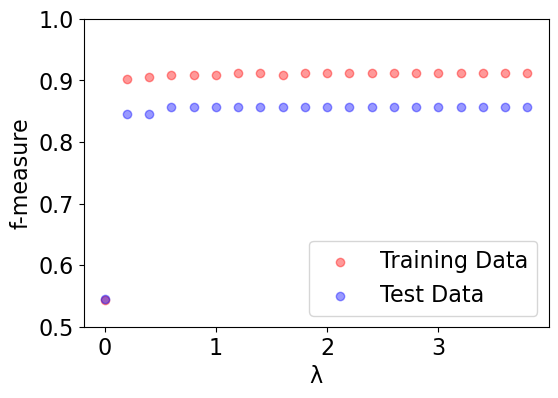

In [30]:
import matplotlib
matplotlib.style.use('default')
# Plot the f-measure of the algorithm’s performance on the training and test 
#  sets as a function of λ:
f_train = []
f_test  = []
for w in weights:
    f_train.append(f_measure(train_lab,predict(train_nolab,w[0])))
    f_test.append(f_measure(test_lab,predict(test_nolab,w[0])))

import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)

plt.figure(figsize=(6,4)) 

plt.scatter(lambda_ls,f_train,
            alpha=0.4,
            color='red',label="Training Data"
           )
plt.scatter(lambda_ls,f_test,
            alpha=0.4,
            color='blue',label="Test Data"
           )
plt.legend()
plt.ylabel("f-measure") 
plt.xlabel("λ") 


plt.ylim(0.5,1)

plt.show()



**Note:** when performing the training after normalizing the features the model performs much better as expected. This shows the importance of normalizing the features particularly if the feature values vary widely in their range as they can make it difficult for the algorithm to fit the model.

# Problem 3
Apply three clustering techniques to the handwritten digits dataset. Assume that k = 10. (25 points)

a) K-means clustering (implemented in Problem 1).

b) Agglomerative clustering with Ward linkage (sklearn.cluster.AgglomerativeClustering).
    http://scikit-learn.org/stable/modules/clustering.html%23hierarchical-clustering

c) Affinity Propagation (sklearn.cluster.AffinityPropagation).
    http://scikit-learn.org/stable/modules/clustering.html%23affinity-propagation

The dataset you will be working with is the handwritten digits and the details can be found here:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
    
    
### Assess all three clustering algorithms using the following protocol:
* Each cluster should be defined by the digit that represents the majority of the current cluster. For examples, if in the second cluster, there are 60 data points of digit “5”, 40 of “3” and 25 of “2”, the cluster is labeled as “5”.
* Report the 10x10 confusion matrix by comparing the predicted clusters with the actual labels of the datasets. If the clustering procedure resulted in less than 10 clusters, output “-1” in the position to the missing clusters in the confusion matrix.
* Calculate the accuracy of each clustering method using the Fowlkes-Mallows index (sklearn.metrics.fowlkes_mallows_score).
http://scikit-learn.org/stable/modules/clustering.html%23fowlkes-mallows-scores


In [14]:
# Helper Functions
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


def define_cluster(df):
    '''defines the cluster based on the majority of the values in that cluster'''
    clusters = list(set(df.cluster))
    # get most frequent value in each cluster
    cluster_name = dict()
    for c in clusters:
        cluster_name[c]=int(df[df.cluster == c].target.mode())
    df["cluster_name"] = df["cluster"].replace(cluster_name)
    return df
    


def assess_results(df):
    '''Reports confusion matrix and Fowlkes-Mallows index for the clustering'''
    # Report the 10x10 confusion matrix by comparing the predicted clusters with the actual labels of the datasets.
    #    If the clustering procedure resulted in less than 10 clusters, output “-1” in the position to the missing clusters in the confusion matrix.
    confusion_matrix(df["target"], df["cluster_name"],labels=list(range(0,10)))

    df_cm = pd.DataFrame(confusion_matrix(df["target"], df["cluster_name"],labels=list(range(0,10))))
    plt.figure(figsize=(10,7))
    sn.set(font_scale=1.4) # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 12},fmt='g',cmap='Blues')
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    plt.show()
#     plt.savefig("fig.png",bbox_inches="tight",dpi=300,transparent=True)

    # Calculate the accuracy of each clustering method using the Fowlkes-Mallows index (sklearn.metrics.fowlkes_mallows_score).
    from sklearn.metrics.cluster import fowlkes_mallows_score
    print("Fowlkes-Mallows index:")
    print(fowlkes_mallows_score(df["target"], df["cluster_name"]))



## a) K-means clustering

Fowlkes-Mallows index:
0.7005048429715834


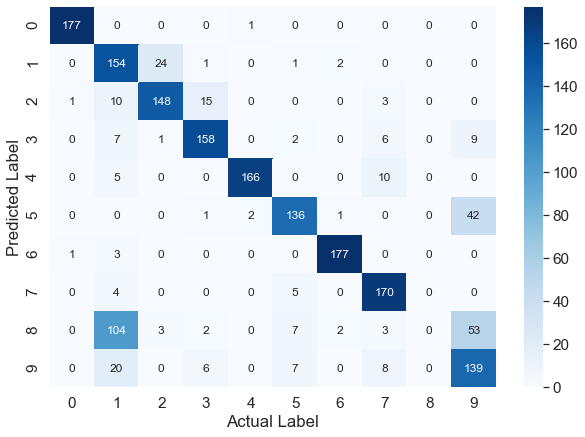

In [15]:
# K-means clustering with sklearn package

# Load in digit data
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits(as_frame=True)
d_df = digits.data

# add target values to the dataframe for comparison
d_df["target"] = digits.target
k = 10 


from sklearn.cluster import KMeans
k_means_clust = KMeans(n_clusters=k).fit(d_df)
d_df_kmeans_2 = d_df.copy()
d_df_kmeans_2["cluster"] = k_means_clust.labels_

# define the clusters by the majority of the digits in them
d_df_kmeans_2 = define_cluster(d_df_kmeans_2)

assess_results(d_df_kmeans_2)




## b) Agglomerative clustering with Ward linkage

Fowlkes-Mallows index:
0.8261115300699259


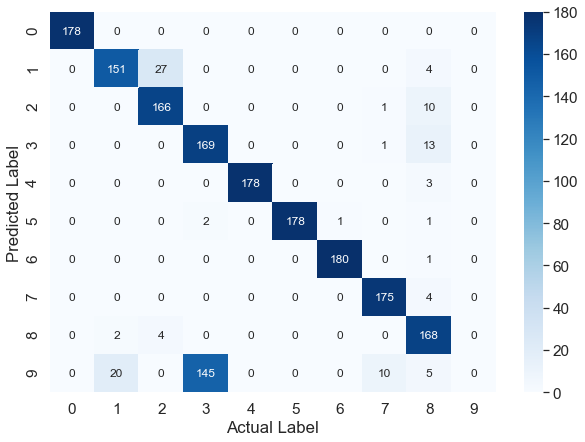

In [16]:
# Agglomerative clustering with Ward linkage

# Load in digit data
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits(as_frame=True)
d_df = digits.data

# add target values to the dataframe for comparison
d_df["target"] = digits.target
k = 10 

from sklearn.cluster import AgglomerativeClustering
agglom_clust = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(d_df)
d_df_agglom = d_df.copy()
d_df_agglom["cluster"] = agglom_clust.labels_

# define the clusters by the majority of the digits in them
d_df_agglom = define_cluster(d_df_agglom)

assess_results(d_df_agglom)




## c) Affinity Propagation

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


Fowlkes-Mallows index:
0.9487265300529211


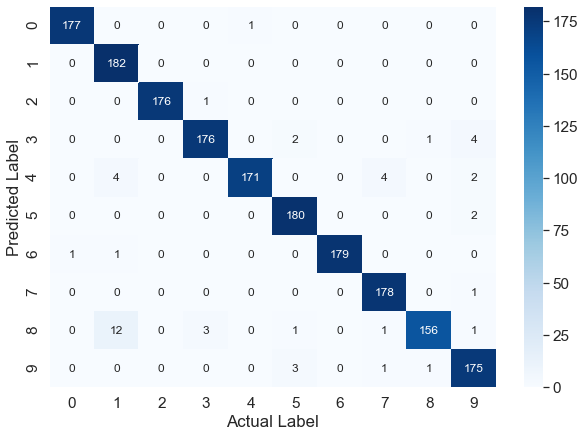

In [17]:
# Affinity Propagation

# Load in digit data
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
digits = load_digits(as_frame=True)
d_df = digits.data

# add target values to the dataframe for comparison
d_df["target"] = digits.target
k = 10

from sklearn.cluster import AffinityPropagation
affinprop_clust = AffinityPropagation().fit(d_df) 


d_df_affinprop = d_df.copy()
d_df_affinprop["cluster"] = affinprop_clust.labels_

# define the clusters by the majority of the digits in them
d_df_affinprop = define_cluster(d_df_affinprop)

assess_results(d_df_affinprop)

    

# Problem 4
Apply three classification algorithms to the same ckd_data.zip dataset as in Problem 2. (15 points)

a) Support Vector Machine with the linear kernel and default parameters (sklearn.svm.SVC).

b) Support Vector Machine with the RBF kernel and default parameters.

c) Random forest with default parameters (sklearn.ensemble.RandomForestClassifier).

###  Assess all three classification algorithms using the following protocol:
* Use 80% of each class data to train your classifier and the remaining 20% to test it. 
* Report the f-measure of the algorithm’s performance on the **training and test sets.**



### Read in the Data and Clean it

In [66]:
# Read in the data
# header for ckd dataset
import pandas as pd
import numpy as np
header = ['age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','classification']
df_ckd = pd.read_csv("ckd_data/chronic_kidney_disease_full.arff",header=None,names=header)

df_ckd = df_ckd.dropna() # Note this only removes empty columns/rows, it does not remove data in which values are missing as those have ?'s in those cells and are handled below

# cleanup, remove "\t" values from all 
df_ckd[list(df_ckd.columns)] = df_ckd[list(df_ckd.columns)].replace({'\t':''}, regex=True)
df_ckd[list(df_ckd.columns)] = df_ckd[list(df_ckd.columns)].replace({' ':''}, regex=True)


# convert ?'s to NaNs
df_ckd = df_ckd.replace('?',np.NaN) 

# convert relevant columns to numbers
for c in df_ckd.columns:
    try:
        df_ckd[c]=pd.to_numeric(df_ckd[c])
    except:
        pass
    
# Handle missing data 
#   for categorical data, missing data is filled in with the mode of that column
#   for numeric data, missing data is filled in with the mean of that column
for i in range( len(df_ckd.columns)):
    if df_ckd.dtypes[i] == float:
        # replace numeric NaNs with means
        df_ckd[df_ckd.columns[i]].fillna(df_ckd[df_ckd.columns[i]].mean(),inplace=True)
    else:
        # replace string values with modes
        df_ckd[df_ckd.columns[i]].fillna(df_ckd[df_ckd.columns[i]].value_counts().idxmax(),inplace=True)


display(df_ckd)




,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,classification
143,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.20000,yes,yes,no,good,no,no,ckd
144,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.152113,...,38.0,6000.0,4.70709,no,no,no,good,no,no,ckd
145,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.70709,no,yes,no,poor,no,yes,ckd
146,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.90000,yes,no,no,poor,yes,yes,ckd
147,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.60000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.90000,no,no,no,good,no,no,notckd
539,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.20000,no,no,no,good,no,no,notckd
540,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.40000,no,no,no,good,no,no,notckd
541,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.90000,no,no,no,good,no,no,notckd


### Generate Feature Vectors from the Data 

In [67]:
# convert categorical data to numeric
qual_header = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification'] # column names of categories that are strings

df_ckd_qual = df_ckd[qual_header]


quant_header = [x for x in list(df_ckd.columns) if x not in qual_header]

df_ckd_quant = df_ckd[quant_header]

# Convert data feature vectors using One hot encoding for the qualitative values
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='error',drop='if_binary')
enc.fit(df_ckd_qual)

df_ckd_qual = pd.DataFrame(enc.transform(df_ckd_qual).toarray())
df_ckd_qual.columns = qual_header





### Scale Features

In [68]:
# normalize numeric columns from 0 to 1
from sklearn import preprocessing

x = df_ckd_quant.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_ckd_quant = pd.DataFrame(x_scaled)
df_ckd_quant.columns = quant_header

df_ckd_quant

# combine the qual and quant data back together into a single dataframe
# reset indices for train_qual to match train_quant
df_ckd_qual = df_ckd_qual.set_index(df_ckd_quant.index)
df_ckd_v = pd.concat([df_ckd_quant,df_ckd_qual], axis=1) 

display(df_ckd_v)



,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,0.522727,0.230769,0.75,0.2,0.0,0.211538,0.088575,0.010582,0.839167,0.047885,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.056818,0.000000,0.75,0.8,0.0,0.269556,0.042362,0.005291,0.839167,0.047885,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,0.856838,0.132221,0.018519,0.839167,0.047885,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.522727,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,0.556818,0.230769,0.25,0.4,0.0,0.179487,0.062901,0.013228,0.839167,0.047885,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,0.602273,0.230769,0.75,0.0,0.0,0.252137,0.121951,0.001323,0.917981,0.053933,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
395,0.454545,0.153846,1.00,0.0,0.0,0.113248,0.075738,0.010582,0.861199,0.022472,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,0.113636,0.230769,0.75,0.0,0.0,0.166667,0.062901,0.002646,0.835962,0.042697,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,0.170455,0.076923,1.00,0.0,0.0,0.196581,0.124519,0.007937,0.823344,0.053933,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Generate Training and Testing Sets

In [69]:
# Randomly select training set and set aside remaining data as the test (or evaluation) set
size = 0.2 

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_ckd_v, test_size=size)

print("Training dataset size:",len(train))
print("Testing dataset size:",len(test))


Training dataset size: 319
Testing dataset size: 80


In [70]:
# remove labels from training dataset
train_nolab = train[list(train.columns)[0:-1]]

train_lab = train["classification"]

display(train_nolab)
display(train_lab)

# remove labels from test dataset
test_nolab = test[list(test.columns)[0:-1]]

test_lab = test["classification"]

display(test_nolab)
display(test_lab)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
66,0.738636,0.153846,0.750000,0.400000,0.000000,0.273504,0.137356,0.015873,0.798107,0.051685,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
197,0.625000,0.230769,0.620028,0.203966,0.090286,0.269556,0.281130,0.117725,0.753943,0.062921,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
389,0.568182,0.230769,1.000000,0.000000,0.000000,0.164530,0.060334,0.005291,0.823344,0.026966,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.250000,0.153846,1.000000,0.000000,0.000000,0.252137,0.055199,0.002646,0.854890,0.049438,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,0.000000,0.203737,0.250000,0.600000,0.000000,0.269556,0.143647,0.035429,0.839167,0.047885,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.772727,0.230769,0.620028,0.203966,0.090286,0.290598,0.214377,0.037037,0.861199,0.022472,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
107,0.602273,0.384615,0.500000,0.200000,0.800000,0.587607,0.132221,0.031746,0.848580,0.044944,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
190,0.045455,0.076923,0.250000,0.800000,0.000000,0.153846,0.168164,0.007937,0.823344,0.053933,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
277,0.500000,0.076923,1.000000,0.000000,0.000000,0.215812,0.114249,0.007937,0.823344,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


66     0.0
197    0.0
389    1.0
279    1.0
215    0.0
      ... 
78     0.0
107    0.0
190    0.0
277    1.0
60     0.0
Name: classification, Length: 319, dtype: float64

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
174,0.590909,0.153846,0.620028,0.203966,0.090286,0.190171,0.370988,0.093915,0.861199,0.049438,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
281,0.602273,0.230769,1.000000,0.000000,0.000000,0.230769,0.124519,0.010582,0.899054,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
382,0.886364,0.230769,1.000000,0.000000,0.000000,0.207265,0.114249,0.003968,0.861199,0.053933,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
214,0.750000,0.230769,0.500000,0.000000,0.000000,0.318376,0.073171,0.007937,0.839167,0.047885,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
323,0.465909,0.230769,1.000000,0.000000,0.000000,0.230769,0.073171,0.009259,0.873817,0.056180,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.670455,0.307692,0.500000,0.000000,0.400000,0.269556,0.143647,0.035429,0.839167,0.047885,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
164,0.136364,0.203737,0.500000,0.000000,0.000000,0.363248,0.034660,0.005291,0.835962,0.038202,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
210,0.647727,0.384615,0.500000,0.800000,0.400000,0.497863,0.335045,0.164021,0.823344,0.071910,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
184,0.590909,0.076923,0.500000,0.600000,0.400000,0.705128,0.347882,0.038360,0.810726,0.044944,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


174    0.0
281    1.0
382    1.0
214    0.0
323    1.0
      ... 
113    0.0
164    0.0
210    0.0
184    0.0
127    0.0
Name: classification, Length: 80, dtype: float64

In [71]:
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def f_measure(actual,predicted):
    '''compute f-measure from array of actual and predicted values'''
    tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
    pre = tp/(tp+fp)
    rec = tp/(tp+fn)
    return (2*pre*rec)/(pre+rec)
    



## a) Support Vector Machine with the linear kernel and default parameters

In [72]:
# Support Vector Machine with the linear kernel and default parameters (sklearn.svm.SVC).
import numpy as np
from sklearn.svm import SVC
clf_linear_svm = SVC(kernel='linear') 
clf_linear_svm.fit(train_nolab,train_lab)


SVC(kernel='linear')

In [73]:
# Compute f-measure
print("f-measure test dataset:",f_measure(test_lab,clf_linear_svm.predict(test_nolab)))
print("f-measure training dataset:",f_measure(train_lab,clf_linear_svm.predict(train_nolab))) 



f-measure test dataset: 0.9508196721311475
f-measure training dataset: 0.9917355371900827


## b) Support Vector Machine with the RBF kernel and default parameters

In [74]:
# Support Vector Machine with the RBF kernel and default parameters
import numpy as np
from sklearn.svm import SVC
clf_rbf_svc = SVC(kernel='rbf') 
clf_rbf_svc.fit(train_nolab,train_lab)



SVC()

In [75]:
# Compute f-measure
print("f-measure test dataset:",f_measure(test_lab,clf_rbf_svc.predict(test_nolab)))
print("f-measure training dataset:",f_measure(train_lab,clf_rbf_svc.predict(train_nolab))) 




f-measure test dataset: 0.9508196721311475
f-measure training dataset: 0.9917355371900827


## c) Random forest with default parameters

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf_rf = RandomForestClassifier()
clf_rf.fit(train_nolab,train_lab)



RandomForestClassifier()

In [77]:
# Compute f-measure
print("f-measure test dataset:",f_measure(test_lab,clf_rf.predict(test_nolab)))
print("f-measure training dataset:",f_measure(train_lab,clf_rf.predict(train_nolab)))






f-measure test dataset: 0.9824561403508771
f-measure training dataset: 1.0


**NOTE**: the scores are very high for these models, much higher than expected. This is likely because the dataset is almost linearly separable. This can be determined by plotting a **TSNE plot (see below)**. This plot shows that the data are almost linearly separable. Therefore the Random Forest and Support Vector Machine classification methods will be able to classify the data almost perfectly for this dataset. The boundary between the CDK positive versus negative patients has a small amount of overlap and is touching, which likely explains why the SVM methods do not classify the data completely perfectly. There is one cluster of positive patients that clearly cluster far from the rest of the group, if all of the positive patients clustered into that group I would expect all of the methods used above to classify the groups perfectly.



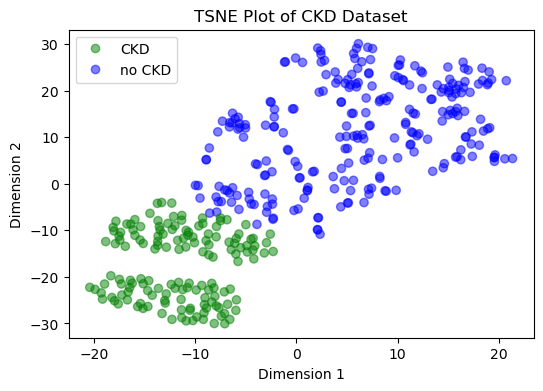

In [118]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
matplotlib.style.use('default')
# Need to plot entire dataset - therefore need split whole dataset into features and labels:
df_ckd_v_nolab = df_ckd_v[list(train.columns)[0:-1]]
df_ckd_v_lab = df_ckd_v["classification"]
X_embedded = TSNE(n_components=2).fit_transform(df_ckd_v_nolab)
X_embedded.shape




fig, ax = plt.subplots(figsize=(6, 4))


    
c_ls = [str(x).replace("1.0","green").replace("0.0","blue") for x in list(df_ckd_v_lab)]
lab_ls = [str(x).replace("1.0","CKD").replace("0.0","no CKD") for x in list(df_ckd_v_lab)]


ax.scatter(
    x =X_embedded[:,0],
    y = X_embedded[:,1],
    color = c_ls,
    alpha = 0.5,
)

for_legend = [Line2D([0], [0], color="green", marker='o', linestyle='None',alpha=0.5),
                Line2D([0], [0], color='blue', marker='o', linestyle='None',alpha=0.5)]

ax.legend(for_legend,['CKD', 'no CKD'],facecolor='white')
ax.set_title("TSNE Plot of CKD Dataset")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

plt.show()
